<a href="https://colab.research.google.com/github/KiranVarghese25/AML_lab/blob/main/AML_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#loading the dataset
data=pd.read_csv("/content/Program_1_Dataset.csv")
data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [ ]:
#checking the shape of the dataset
data_shape=data.shape
print("The nos of rows:-",data_shape[0],"\n The nos of columns:-",data_shape[1])

The nos of rows:- 506 
 The nos of columns:- 14


In [ ]:
#displaying info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


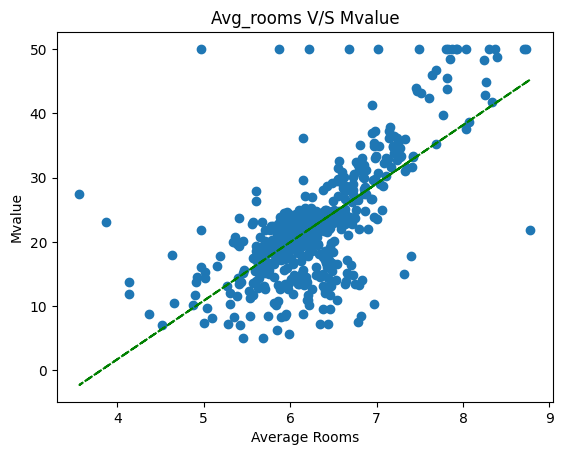

In [ ]:
#EDA
x=data['Avg_rooms ']
y=data['MValue']

plt.scatter(x,y)
z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x),"g--")
plt.xlabel('Average Rooms')
plt.ylabel('Mvalue')
plt.title('Avg_rooms V/S Mvalue')
plt.show()

Inference from the graph
 -> The above graph is a scatter plot between the average rooms and the mvalue.The graph aims to show the realtionship between the 2 columns.
 -> We can observe that the as the number of rooms increase there is an increase in the mvalue.
 -> There are few outliers that exist.

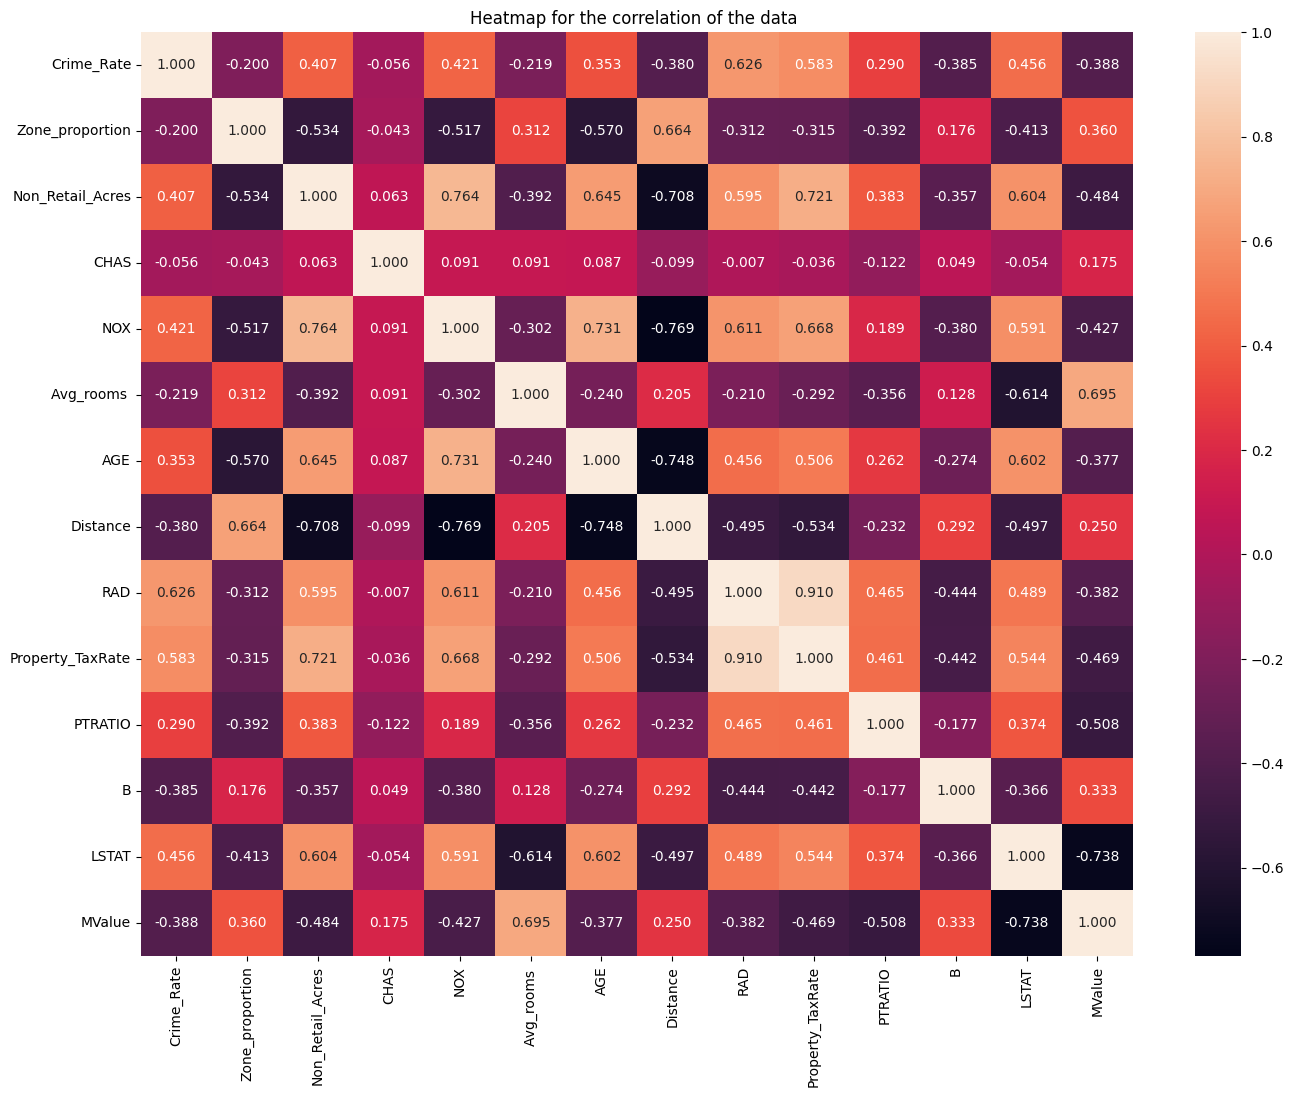

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, fmt=".3f")
plt.title('Heatmap for the correlation of the data ')
plt.show()

Inference from the graph
-> The above graph is a heatmap.It has been used to visually represent the correlation among the columns in the dataset.
-> From the graph we can observe that the column "Avg_rooms" has a strong positive correlation with column "Mvalue".

In [ ]:
#Creating a new Df with only the req columns
new_data=pd.DataFrame(data,columns=['Avg_rooms ','MValue'])
new_data

,Avg_rooms,MValue
0,7.416,33.2
1,6.727,27.5
2,6.781,26.5
3,6.405,18.6
4,6.137,19.3
...,...,...
501,5.854,10.8
502,6.459,11.8
503,6.341,14.9
504,6.251,12.6


The mean value of Mvalue columns is:- 22.532806324110673



Text(0, 0.5, 'MValue')

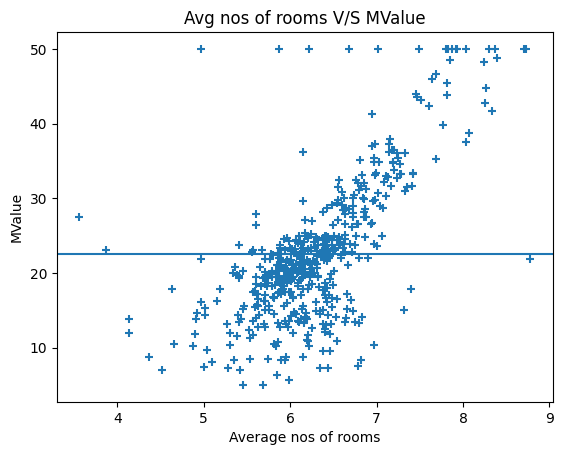

In [ ]:
#Calculating the mean of the target var
mean_val_MValue=new_data['MValue'].mean()
print('The mean value of Mvalue columns is:-',mean_val_MValue)
print()
#plot the actual MValue
plt.scatter(new_data['Avg_rooms '],new_data['MValue'],marker='+')
#plotting the mean
plt.axhline(y=mean_val_MValue)
plt.annotate('Avg MValue',xy=(1,mean_val_MValue+2.5))
plt.title('Avg nos of rooms V/S MValue')
plt.xlabel('Average nos of rooms')
plt.ylabel('MValue')

In [ ]:
#building 4 diff models
new_data['Model_1']=new_data['MValue'].mean()
new_data['Model_2']=10+3*new_data['Avg_rooms ']
new_data['Model_3']=9+3*new_data['Avg_rooms ']
new_data['Model_4']=11+3*new_data['Avg_rooms ']

new_data

,Avg_rooms,MValue,Model_1,Model_2,Model_3,Model_4
0,7.416,33.2,22.532806,32.248,31.248,33.248
1,6.727,27.5,22.532806,30.181,29.181,31.181
2,6.781,26.5,22.532806,30.343,29.343,31.343
3,6.405,18.6,22.532806,29.215,28.215,30.215
4,6.137,19.3,22.532806,28.411,27.411,29.411
...,...,...,...,...,...,...
501,5.854,10.8,22.532806,27.562,26.562,28.562
502,6.459,11.8,22.532806,29.377,28.377,30.377
503,6.341,14.9,22.532806,29.023,28.023,30.023
504,6.251,12.6,22.532806,28.753,27.753,29.753


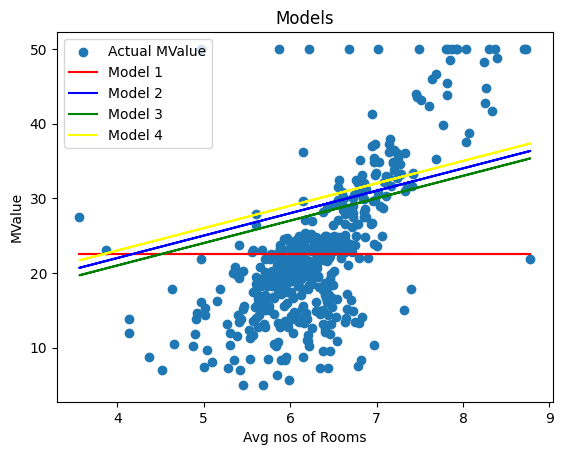

In [ ]:
#Plotting the lines for each model

fig,ax=plt.subplots()

ax.scatter(x='Avg_rooms ',y='MValue',data=new_data,label='Actual MValue')
ax.plot(new_data['Avg_rooms '],new_data['Model_1'],color='red',label='Model 1')
ax.plot(new_data['Avg_rooms '],new_data['Model_2'],color='blue',label='Model 2')
ax.plot(new_data['Avg_rooms '],new_data['Model_3'],color='green',label='Model 3')
ax.plot(new_data['Avg_rooms '],new_data['Model_4'],color='yellow',label='Model 4')

ax.set_ylabel('MValue')
ax.set_xlabel('Avg nos of Rooms')
ax.set_title('Models')
ax.legend()

In [ ]:
#model 1 obs
model_1_obs=pd.DataFrame({
            'Avg_rooms':new_data['Avg_rooms '],
            'Actual_MValue':new_data['MValue'],
            'Predicted_MValue':new_data['Model_1'],
            'Error':(new_data['Model_1']-new_data['MValue'])
})

model_1_obs

,Avg_rooms,Actual_MValue,Predicted_MValue,Error
0,7.416,33.2,22.532806,-10.667194
1,6.727,27.5,22.532806,-4.967194
2,6.781,26.5,22.532806,-3.967194
3,6.405,18.6,22.532806,3.932806
4,6.137,19.3,22.532806,3.232806
...,...,...,...,...
501,5.854,10.8,22.532806,11.732806
502,6.459,11.8,22.532806,10.732806
503,6.341,14.9,22.532806,7.632806
504,6.251,12.6,22.532806,9.932806


In [ ]:
#R squared of the first model
sum(model_1_obs['Error']**2)

42716.29541501977

In [ ]:
#model 2 obs
model_2_obs=pd.DataFrame({
            'Avg_rooms':new_data['Avg_rooms '],
            'Actual_MValue':new_data['MValue'],
            'Predicted_MValue':new_data['Model_2'],
            'Error':(new_data['Model_2']-new_data['MValue'])
})

model_2_obs

,Avg_rooms,Actual_MValue,Predicted_MValue,Error
0,7.416,33.2,32.248,-0.952
1,6.727,27.5,30.181,2.681
2,6.781,26.5,30.343,3.843
3,6.405,18.6,29.215,10.615
4,6.137,19.3,28.411,9.111
...,...,...,...,...
501,5.854,10.8,27.562,16.762
502,6.459,11.8,29.377,17.577
503,6.341,14.9,29.023,14.123
504,6.251,12.6,28.753,16.153


In [ ]:
#R squared of the second model
sum(model_2_obs['Error']**2)

51562.75862299999

In [ ]:
#model 3 obs
model_3_obs=pd.DataFrame({
            'Avg_rooms':new_data['Avg_rooms '],
            'Actual_MValue':new_data['MValue'],
            'Predicted_MValue':new_data['Model_3'],
            'Error':(new_data['Model_3']-new_data['MValue'])
})

model_3_obs

,Avg_rooms,Actual_MValue,Predicted_MValue,Error
0,7.416,33.2,31.248,-1.952
1,6.727,27.5,29.181,1.681
2,6.781,26.5,29.343,2.843
3,6.405,18.6,28.215,9.615
4,6.137,19.3,27.411,8.111
...,...,...,...,...
501,5.854,10.8,26.562,15.762
502,6.459,11.8,28.377,16.577
503,6.341,14.9,28.023,13.123
504,6.251,12.6,27.753,15.153


In [ ]:
#R squared of the third  model
sum(model_3_obs['Error']**2)

45671.80862299998

In [ ]:
#model 4 obs
model_4_obs=pd.DataFrame({
            'Avg_rooms':new_data['Avg_rooms '],
            'Actual_MValue':new_data['MValue'],
            'Predicted_MValue':new_data['Model_4'],
            'Error':(new_data['Model_4']-new_data['MValue'])
})

model_4_obs

,Avg_rooms,Actual_MValue,Predicted_MValue,Error
0,7.416,33.2,33.248,0.048
1,6.727,27.5,31.181,3.681
2,6.781,26.5,31.343,4.843
3,6.405,18.6,30.215,11.615
4,6.137,19.3,29.411,10.111
...,...,...,...,...
501,5.854,10.8,28.562,17.762
502,6.459,11.8,30.377,18.577
503,6.341,14.9,30.023,15.123
504,6.251,12.6,29.753,17.153


In [ ]:
#R squared of the fourth model
sum(model_4_obs['Error']**2)

58465.708623000006

In [ ]:
x=new_data['Avg_rooms ']
y=new_data['MValue']

xy=x*y
n=len(new_data)

xmean=new_data['Avg_rooms '].mean()
ymean=new_data['MValue'].mean()


num=xy.sum()-n*xmean*ymean
denum=(x**2).sum() -n*(xmean**2)

m=num/denum
c=ymean -(m*xmean)

print('intercept-c:',c,'co-efficient-m',m)

intercept-c: -34.67062077643849 co-efficient-m 9.102108981180297


In [ ]:
#Building the best fitmodel

best_fit_model=c+m*new_data['Avg_rooms ']
new_data['best_fit_model']=best_fit_model
new_data[['Avg_rooms ','MValue','best_fit_model']]

,Avg_rooms,MValue,best_fit_model
0,7.416,33.2,32.830619
1,6.727,27.5,26.559266
2,6.781,26.5,27.050780
3,6.405,18.6,23.628387
4,6.137,19.3,21.189022
...,...,...,...
501,5.854,10.8,18.613125
502,6.459,11.8,24.119901
503,6.341,14.9,23.045852
504,6.251,12.6,22.226662


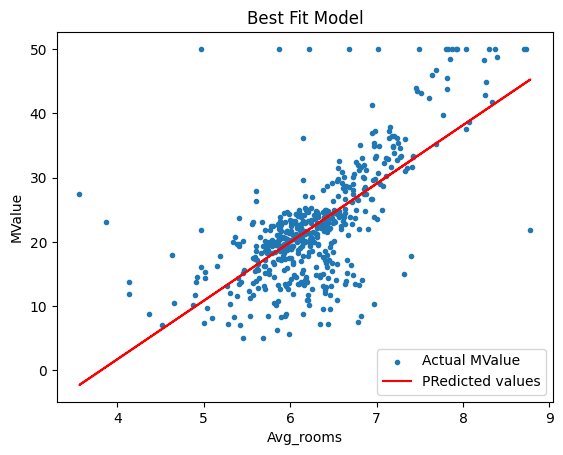

In [ ]:
#plotting the line for the best fit model
fig,ax=plt.subplots()

ax.scatter(x='Avg_rooms ',y='MValue',data=new_data,label='Actual MValue',marker='.')
ax.plot(new_data['Avg_rooms '],new_data['best_fit_model'],color='red',label='PRedicted values')

ax.set_xlabel('Avg_rooms')
ax.set_ylabel('MValue')
ax.set_title('Best Fit Model')
ax.legend()

In [ ]:
#Best Fit model obs
bfm_obs=pd.DataFrame({
            'Avg_rooms':new_data['Avg_rooms '],
            'Actual_MValue':new_data['MValue'],
            'Predicted_MValue':new_data['best_fit_model'],
            'Error':(new_data['best_fit_model']-new_data['MValue'])
})

bfm_obs

,Avg_rooms,Actual_MValue,Predicted_MValue,Error
0,7.416,33.2,32.830619,-0.369381
1,6.727,27.5,26.559266,-0.940734
2,6.781,26.5,27.050780,0.550780
3,6.405,18.6,23.628387,5.028387
4,6.137,19.3,21.189022,1.889022
...,...,...,...,...
501,5.854,10.8,18.613125,7.813125
502,6.459,11.8,24.119901,12.319901
503,6.341,14.9,23.045852,8.145852
504,6.251,12.6,22.226662,9.626662


In [ ]:
new_data.head()

,Avg_rooms,MValue,Model_1,Model_2,Model_3,Model_4,best_fit_model
0,7.416,33.2,22.532806,32.248,31.248,33.248,32.830619
1,6.727,27.5,22.532806,30.181,29.181,31.181,26.559266
2,6.781,26.5,22.532806,30.343,29.343,31.343,27.050780
3,6.405,18.6,22.532806,29.215,28.215,30.215,23.628387
4,6.137,19.3,22.532806,28.411,27.411,29.411,21.189022


In [ ]:
#calculating the R_squared value for the best fit  model

sst=sum((new_data['MValue']-new_data['MValue'].mean())**2)
print("The total sum of sqaure is:-",sst)

sse=sum(bfm_obs['Error']**2)
print("The residual  sum of sqaure is:-",sse)

ssr=sst-sse
print("The ssr value  is:-",ssr)

print()

r_squared_val=ssr/sst
print("The R_squared value  is:-",r_squared_val)

The total sum of sqaure is:- 42716.29541501977
The residual  sum of sqaure is:- 22061.879196211812
The ssr value  is:- 20654.416218807957

The R_squared value  is:- 0.48352545599133384


In [ ]:
#splitting the dataset
X=data[['Avg_rooms ']]
y=data[['MValue']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [ ]:
#model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print("Intercept:",model.intercept_)
print("Coefficients",model.coef_)

Intercept: [-33.5101476]
Coefficients [[8.92620222]]


In [ ]:
#Evaluation metrics

# 1)Mean Sqaured Error
mean_sq_err=mean_squared_error(y_pred,y_test)
print("The mean sqaured error of the model is:-",mean_sq_err)

# 2) R Squared

r_sq=r2_score(y_test,y_pred)
print("The R Square value of the model is:-",r_sq)



The mean sqaured error of the model is:- 33.853804802145724
The R Square value of the model is:- 0.5424461839891813
